## Breast Cancer Machine Learning Techniques
Machine Learning with Breast Cancer data set. 

+ Raul Eulogio

## Abstract
For this quick project, I wanted to implement a few **Machine Learning** techniques on a data set containing descriptive attributes of a digitized image of a fine needle aspirate (**FNA**) of breast mass. We have a total of 29 features that were computed for each cell nucleus with an ID Number and the Diagnosis (**Malignant** = M, **Benign** = B). 

This is basically almost the same as the other notebook in this repo but added statistical analysis on the expanded dataset!

Things added (2/3/2017):
+ Exploratory analysis
+ Better ROC Curve Visuals 
+ More Comments

Still need to add explanations but that takes a long time so I'm holding off on that part

<img src="https://www.researchgate.net/profile/Syed_Ali39/publication/41810238/figure/fig5/AS:281736006127621@1444182506838/Figure-2-Fine-needle-aspiration-of-a-malignant-solitary-fibrous-tumor-is-shown-A-A.png">


Ex. Image of a malignant solitary fibrous tumor using **FNA**

This is popular data set used for machine learning purposes, and I plan on using the same techniques I used for another data set that performed poorly due to having too many *Categorical* variables.

Here are the **Machine learning methods** I decided to use:

+ Kth Nearest Neighbor
+ Decision Trees
+ (Bagging) Random Forest
+ Neural Networks

I employ critical data analysis modules in this project, emphasizing on: 

+ pandas
+ scikit learn 
+ matplotlib (for visuals)
+ seaborn (easier to make statistical plots)

## 1. Load Modules
We load our modules into our python environment. In my case I am employing a **Jupyter Notebook** while running inside an **Anaconda** environment. 

For now to illustrate and show the module versions in a simple way I will name the ones I used and show the version I used as follows:

+ numpy==1.11.2
+ pandas==0.18.1
+ matplotlib==1.5.3
+ sklearn==0.18.1

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd # Data frames
import matplotlib.pyplot as plt # Visuals
import seaborn as sns # Danker visuals
from sklearn.model_selection import train_test_split # Create training and test sets
from sklearn.neighbors import KNeighborsClassifier # Kth Nearest Neighbor
from sklearn.tree import DecisionTreeClassifier # Decision Trees
from sklearn.tree import export_graphviz # Extract Decision Tree visual
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.neural_network import MLPClassifier # Neural Networks
from sklearn.metrics import roc_curve # ROC Curves
from urllib.request import urlopen # Get data from UCI Machine Learning Repository

pd.set_option('display.max_columns', 500) # Included to show all the columns since it is a fairly large data set
plt.style.use('ggplot') # Using ggplot2 style visuals because that's how I learned my visuals and I'm sticking to it!

## Loading Data

In [2]:
UCI_data_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'

names = ['id_number', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 
         'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 
         'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 
         'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 
         'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
         'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 
         'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'] 

breastCancer = pd.read_csv(urlopen(UCI_data_URL), names=names)

breastCancer.set_index(['id_number'], inplace = True)
breastCancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
id_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# Converted to binary to help later on with models and plots
breastCancer['diagnosis'] = breastCancer['diagnosis'].map({'M':1, 'B':0})

In [4]:
print("Here's the dimensions of our data frame:")
print(breastCancer.shape)
print("Here's the data types of our columns:")
print(breastCancer.dtypes)

Here's the dimensions of our data frame:
(569, 31)
Here's the data types of our columns:
diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
c

## Exploratory Analysis

An important process in **Machine Learning** is doing **Exploratory Analysis** to get a *feel* for your data. As well as creating visuals that can be digestable for anyone of any skill level is trying to learn from your data analysis. 

Exploratory analysis is slept on so here's a shit load of visuals to help with understanding the data

In [5]:
breastCancer.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Pair Plot

Here I cheated I referenced my later data analysis to see the relationship between variables that proved to be good indicators for some of my processes.

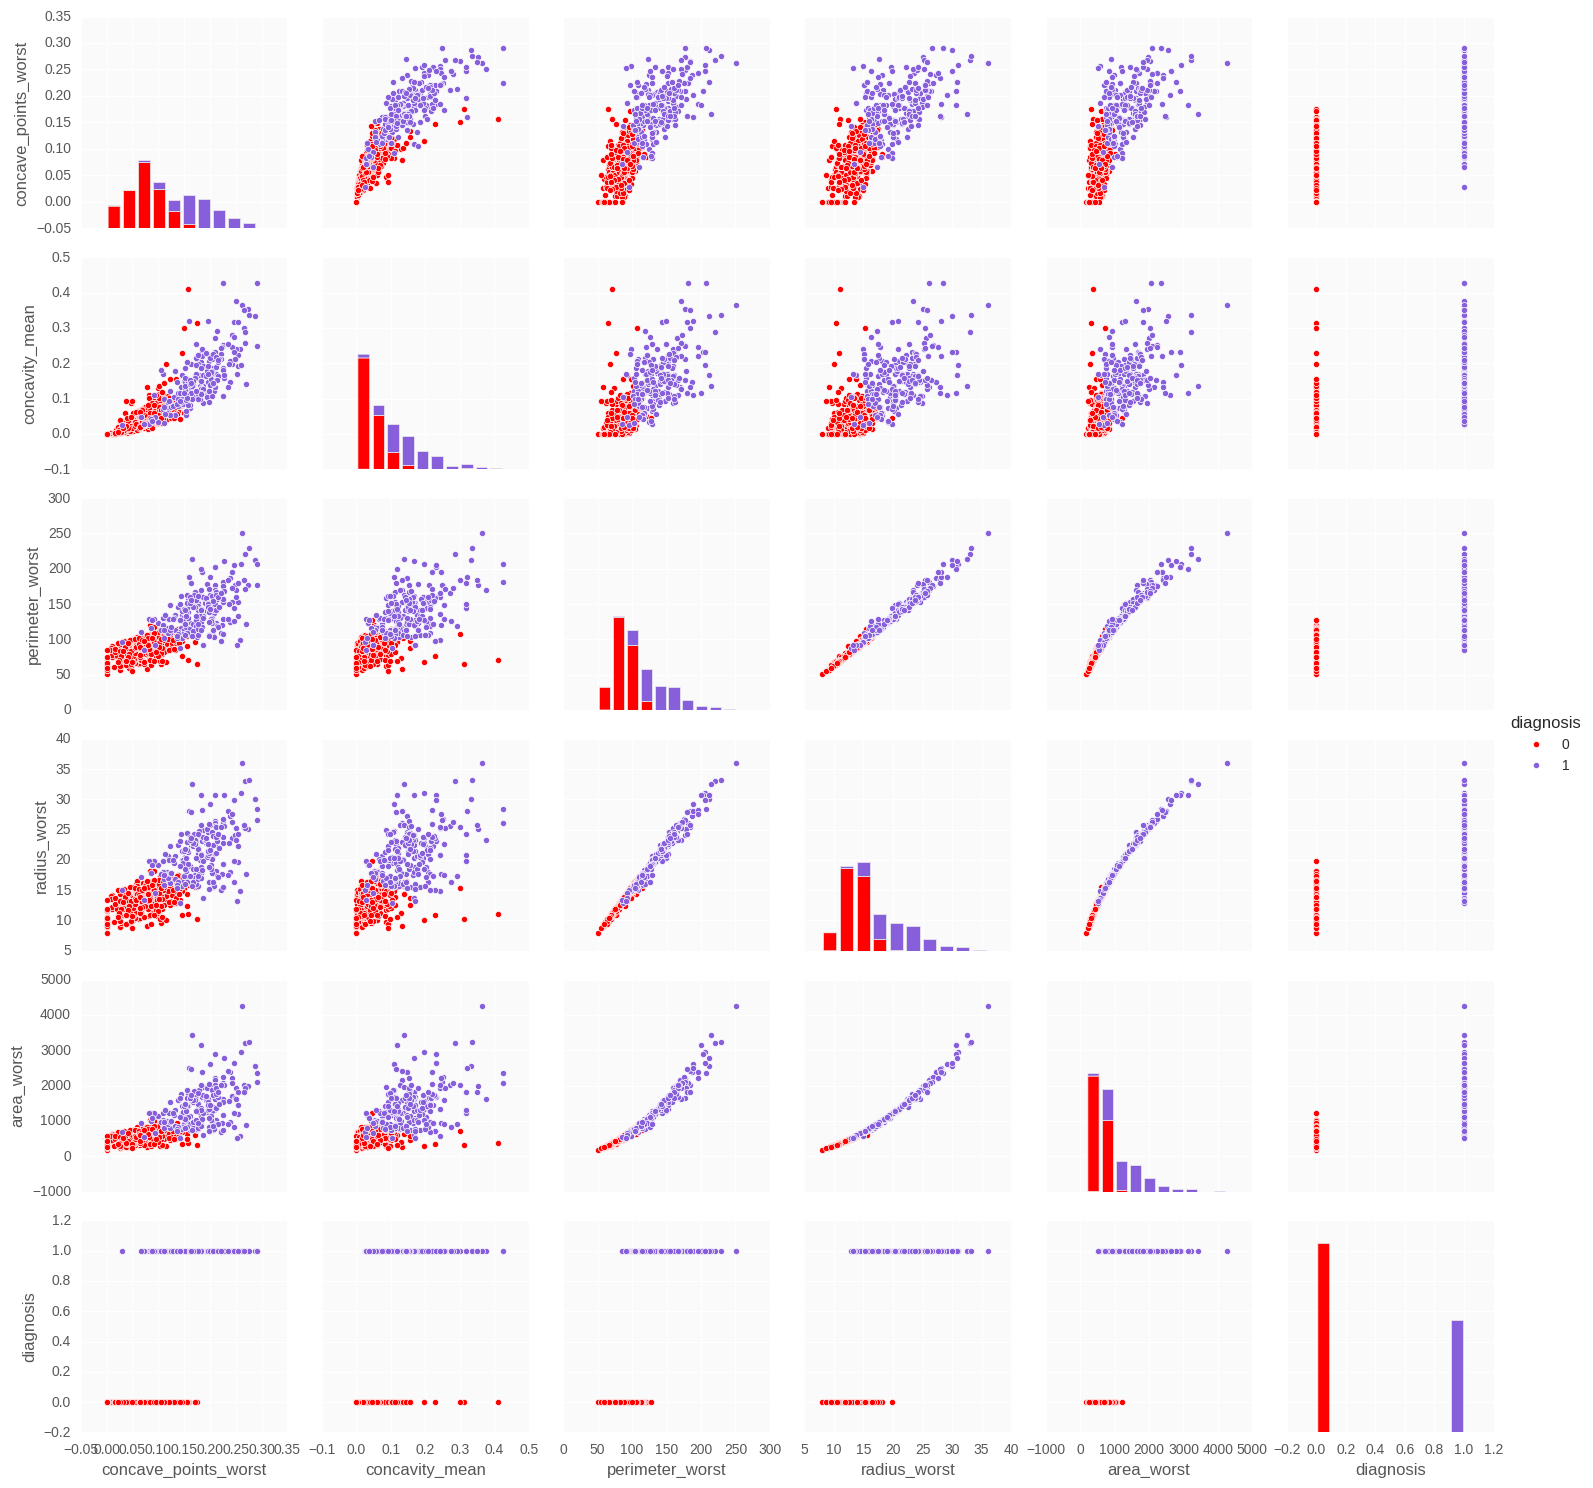

In [6]:
# Variables chosen from Decision Trees modeling. See more in Decision Tree Section
breastCancerSamp = breastCancer.loc[:, ['concave_points_worst', 'concavity_mean', 'perimeter_worst', 'radius_worst', 'area_worst', 'diagnosis']]

sns.set_palette(palette = ('Red', '#875FDB'))
pairPlots = sns.pairplot(breastCancerSamp, hue = 'diagnosis')
pairPlots.set(axis_bgcolor='#fafafa')

plt.show()


## Pearson Correlation Matrix
Explanation here

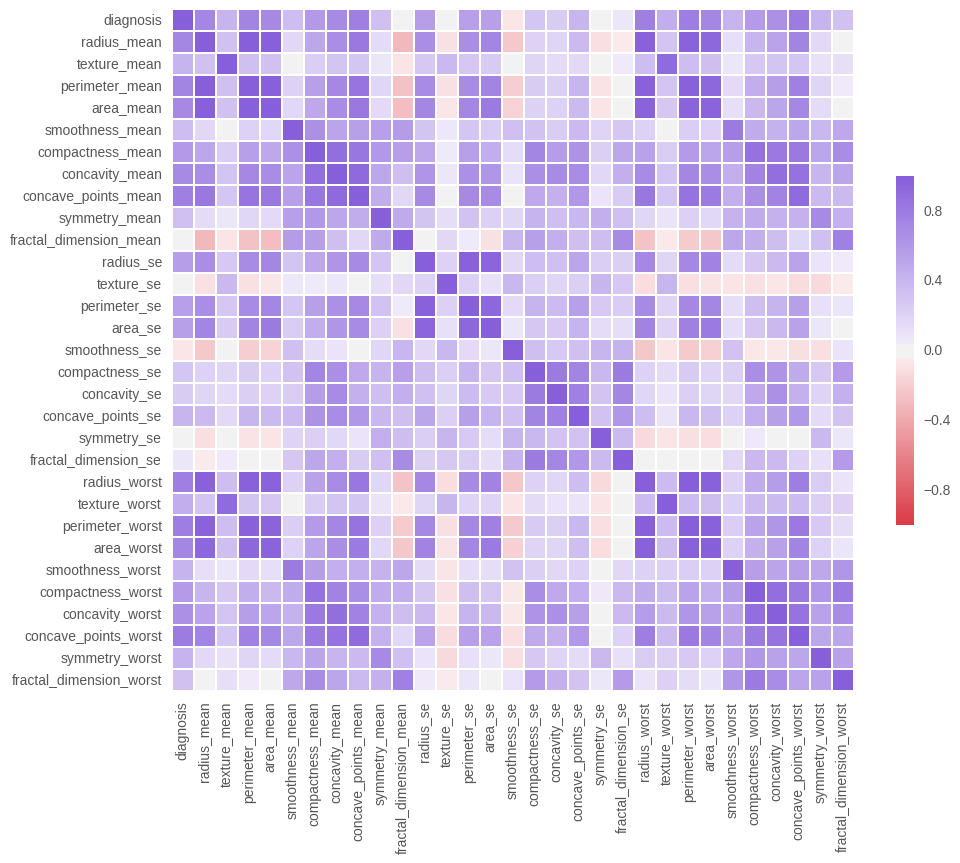

In [7]:
corr = breastCancer.corr(method = 'pearson') # Correlation Matrix

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 275, as_cmap=True)


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  cmap=cmap,square=True, 
            xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

## Box Plot 

For entire data set. Remember our data hasn't been *normalized* so the boxplots for now won't give us a good visual aid, but I included it to show the difference in ability to interpret when data is *normalized*.

Recall on when using the *.describe()* function there were some variables that had a max as high as **4k** while others were as small as *.00n* so I limit the x-axis to give a better picture of the variables. But basically its impossible to visualize them all given the high variance in data set distribution, 

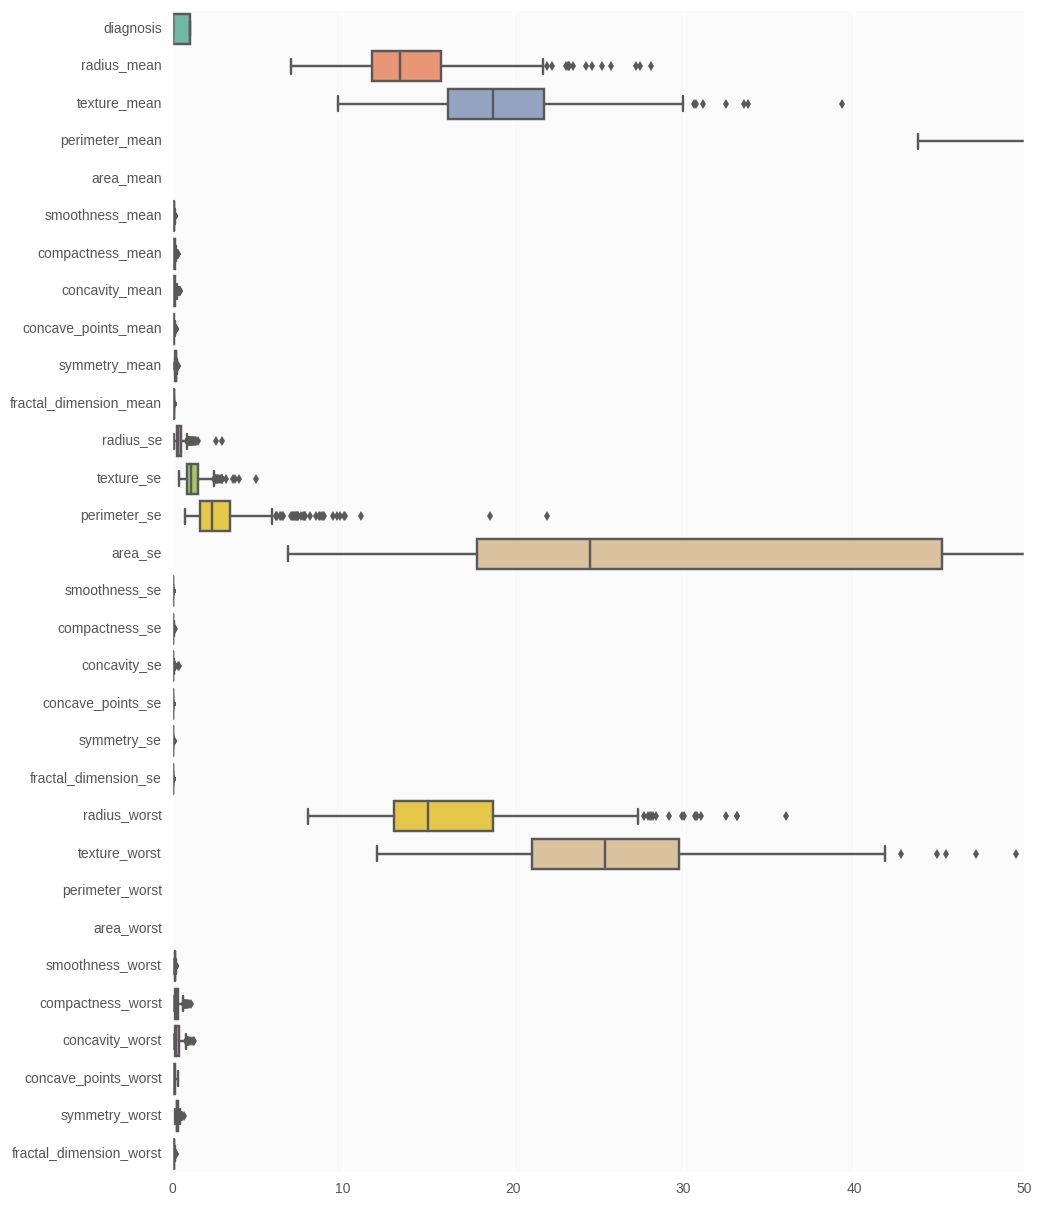

In [8]:
f, ax = plt.subplots(figsize=(11, 15))

ax.set_axis_bgcolor('#fafafa')
ax.set(xlim=(-.05, 50))
ax = sns.boxplot(data = breastCancer, orient = 'h', palette = 'Set2')

Here we see that we can't see the anything worth while and will act as a good segue into normalizing data to help create a better understanding for our data and visuals!

# Normalizing data set

Need to normalize to properly apply our **Machine Learning** algorithms!

In [9]:
breastCancerTest = breastCancer.iloc[:, 1:]

for item in breastCancer:
    if item in breastCancerTest:
        breastCancer_norm = (breastCancerTest - breastCancerTest.min()) / (breastCancerTest.max() - breastCancerTest.min())
print(breastCancer_norm.iloc[:, 0:6].head())

           radius_mean  texture_mean  perimeter_mean  area_mean  \
id_number                                                         
842302        0.521037      0.022658        0.545989   0.363733   
842517        0.643144      0.272574        0.615783   0.501591   
84300903      0.601496      0.390260        0.595743   0.449417   
84348301      0.210090      0.360839        0.233501   0.102906   
84358402      0.629893      0.156578        0.630986   0.489290   

           smoothness_mean  compactness_mean  
id_number                                     
842302            0.593753          0.792037  
842517            0.289880          0.181768  
84300903          0.514309          0.431017  
84348301          0.811321          0.811361  
84358402          0.430351          0.347893  


## Concatentating Data Frame

In [10]:
df = breastCancer.drop(breastCancerTest, axis=1)

breastCancer = pd.concat([breastCancer_norm, df], axis=1)

print(breastCancer.shape)
print("Let's view some of our variables!")
print(breastCancer.iloc[:, 0:5].head())

(569, 31)
Let's view some of our variables!
           radius_mean  texture_mean  perimeter_mean  area_mean  \
id_number                                                         
842302        0.521037      0.022658        0.545989   0.363733   
842517        0.643144      0.272574        0.615783   0.501591   
84300903      0.601496      0.390260        0.595743   0.449417   
84348301      0.210090      0.360839        0.233501   0.102906   
84358402      0.629893      0.156578        0.630986   0.489290   

           smoothness_mean  
id_number                   
842302            0.593753  
842517            0.289880  
84300903          0.514309  
84348301          0.811321  
84358402          0.430351  


## Box Plot of Transformed Data

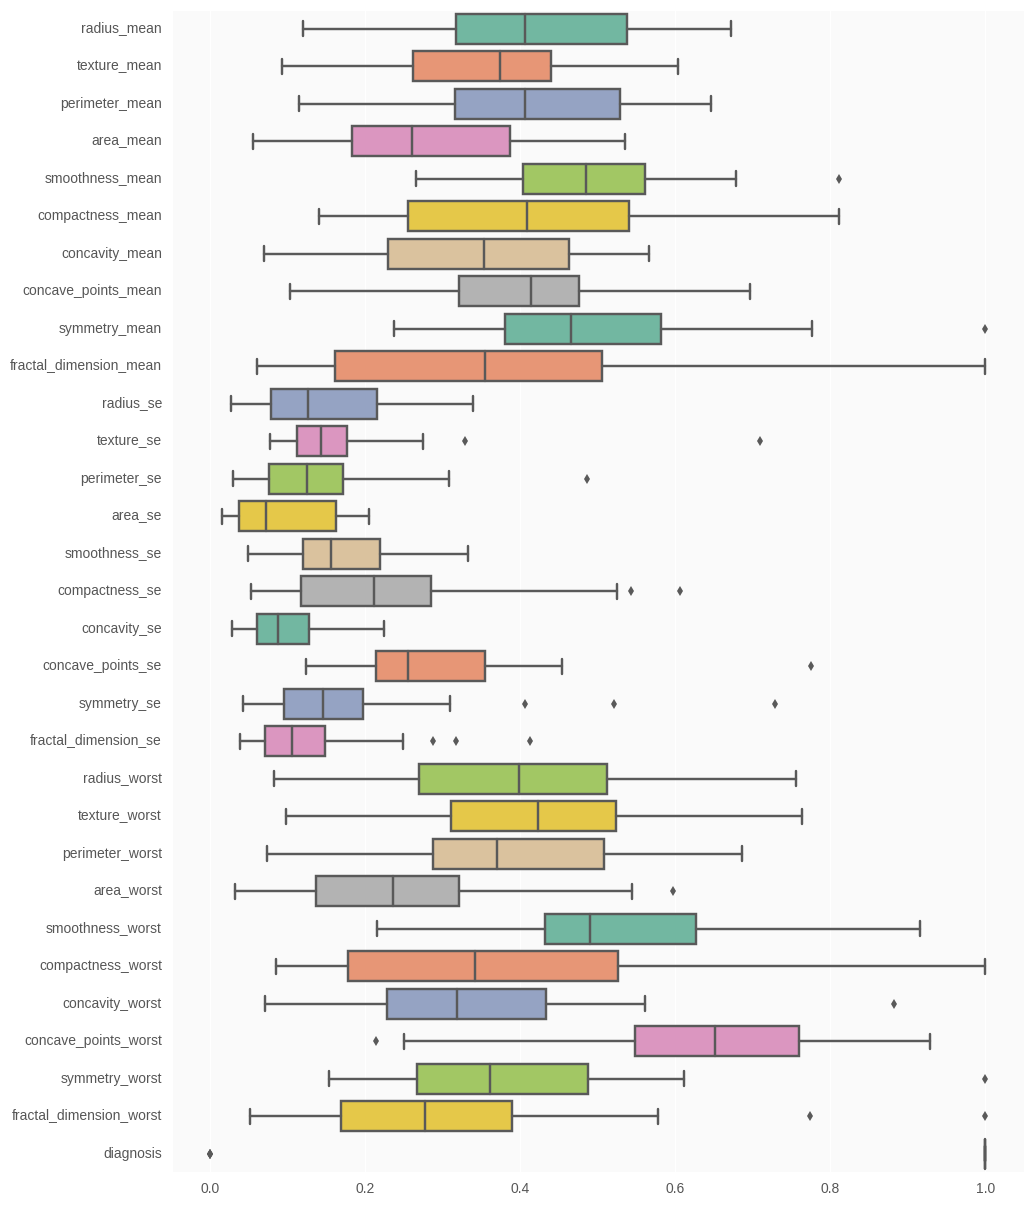

In [11]:
f, ax = plt.subplots(figsize=(11, 15))

ax.set_axis_bgcolor('#fafafa')
ax.set(xlim=(-.05, 1.05))
ax = sns.boxplot(data = breastCancer[1:29], orient = 'h', palette = 'Set2')

## Model Estimation
### Creating Training and Test Sets

In [12]:
train, test = train_test_split(breastCancer, test_size = 0.20, random_state = 42)

train_set = train.ix[:, train.columns != 'diagnosis']
class_set = train.ix[:, train.columns == 'diagnosis']

test_set = test.ix[:, test.columns != 'diagnosis']
test_class_set = test.ix[:, test.columns == 'diagnosis']

## Kth Nearest Neighbor

In [13]:
breastCancerKnn = KNeighborsClassifier(n_neighbors=9)

In [14]:
breastCancerKnn.fit(train_set, class_set['diagnosis'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

## Training Set Calculations
We skip this process in other algorithms since its not really what we're after.

In [15]:
predictionsTrain = breastCancerKnn.predict(train_set)

print(pd.crosstab(predictionsTrain, class_set['diagnosis']))

accuracyTrain = breastCancerKnn.score(train_set, class_set['diagnosis'])

print("Here is our accuracy for our training set:")
print('%.3f' % accuracyTrain)

diagnosis    0    1
row_0              
0          285    9
1            1  160
Here is our accuracy for our training set:
0.978


In [16]:
print("The train error rate for our model is:")
train_error_rate = 1 - accuracyTrain  
print('%.5f' % train_error_rate)

The train error rate for our model is:
0.02198


## Test Set Evaluations

In [17]:
predictions = breastCancerKnn.predict(test_set)

print(pd.crosstab(predictions, test_class_set['diagnosis']))

accuracy = breastCancerKnn.score(test_set, test_class_set['diagnosis'])

print("Here is our accuracy for our training set:")
print('%.3f' % accuracy)

diagnosis   0   1
row_0            
0          69   2
1           2  41
Here is our accuracy for our training set:
0.965


In [18]:
# Here we calculate the test error rate!
print("The test error rate for our model is:")
test_error_rate = 1 - accuracy
print('%.5f' % test_error_rate)

The test error rate for our model is:
0.03509


### Calculating for later use in ROC Curves

In [19]:
fpr, tpr, _ = roc_curve(predictions, test_class_set)

## Decision Trees

In [20]:
dt = DecisionTreeClassifier(random_state = 42)
fit = dt.fit(train_set, class_set)

In [21]:
with open('breastCancerWD.dot', 'w') as f:
    f = export_graphviz(fit, out_file = f)

<img src='dtWD.png'>

## Variable Importance

In [22]:
importances = fit.feature_importances_
indices = np.argsort(importances)[::-1]
indices

array([ 7, 27,  1, 20, 22, 19, 21, 17, 13, 24, 16, 14,  4,  9,  5,  6,  3,
        2,  8, 29, 10, 11, 12, 28, 15, 18, 23, 25, 26,  0])

In [23]:
namesInd = names[2:] # Cus the name list has 'id_number' and 'diagnosis' so we exclude those

# Print the feature ranking
print("Feature ranking:")

for f in range(29):
    i = f
    print("%d. The feature '%s' has a Gini Importance of %f" % (f + 1, namesInd[indices[i]], importances[indices[f]]))

Feature ranking:
1. The feature 'concave_points_mean' has a Gini Importance of 0.691420
2. The feature 'concave_points_worst' has a Gini Importance of 0.065651
3. The feature 'texture_mean' has a Gini Importance of 0.058478
4. The feature 'radius_worst' has a Gini Importance of 0.052299
5. The feature 'perimeter_worst' has a Gini Importance of 0.051494
6. The feature 'fractal_dimension_se' has a Gini Importance of 0.018554
7. The feature 'texture_worst' has a Gini Importance of 0.017445
8. The feature 'concave_points_se' has a Gini Importance of 0.015931
9. The feature 'area_se' has a Gini Importance of 0.011983
10. The feature 'smoothness_worst' has a Gini Importance of 0.009233
11. The feature 'concavity_se' has a Gini Importance of 0.006276
12. The feature 'smoothness_se' has a Gini Importance of 0.001237
13. The feature 'smoothness_mean' has a Gini Importance of 0.000000
14. The feature 'fractal_dimension_mean' has a Gini Importance of 0.000000
15. The feature 'compactness_mean' ha

## Test Set Evaluations

In [24]:
accuracy_dt = fit.score(test_set, test_class_set['diagnosis'])

print("Here is our mean accuracy on the test set:")
print('%.2f' % accuracy_dt)

Here is our mean accuracy on the test set:
0.95


In [25]:
predictions_dt = fit.predict(test_set)

print("Table comparing actual vs. predicted values for our test set:")
print(pd.crosstab(predictions_dt, test_class_set['diagnosis']))

Table comparing actual vs. predicted values for our test set:
diagnosis   0   1
row_0            
0          68   3
1           3  40


In [26]:
# Here we calculate the test error rate!
print("The test error rate for our model is:")
test_error_rate_dt = 1 - accuracy_dt
print('%.5f' % test_error_rate_dt)

The test error rate for our model is:
0.05263


### Calculating for later use in ROC Curves

In [27]:
fpr1, tpr1, _ = roc_curve(predictions_dt, test_class_set)

## Random Forest

In [28]:
fit_RF = RandomForestClassifier(n_estimators = 148)

In [29]:
fit_RF.fit(train_set, class_set['diagnosis'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=148, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

## Variable Importance

In [30]:
importancesRF = fit_RF.feature_importances_
indicesRF = np.argsort(importancesRF)[::-1]
indicesRF

array([27,  7, 22, 23, 20,  6,  2,  3, 26, 13,  0, 25, 21,  1, 12, 10, 28,
       24,  5, 19,  4, 16,  9, 29, 11, 15, 14,  8, 17, 18])

In [31]:
# Print the feature ranking
print("Feature ranking:")

for f in range(29):
    i = f
    print("%d. The feature '%s' has a Gini Importance of %f" % (f + 1, namesInd[indicesRF[i]], importancesRF[indicesRF[f]]))

Feature ranking:
1. The feature 'concave_points_worst' has a Gini Importance of 0.151178
2. The feature 'concave_points_mean' has a Gini Importance of 0.129255
3. The feature 'perimeter_worst' has a Gini Importance of 0.115750
4. The feature 'area_worst' has a Gini Importance of 0.109561
5. The feature 'radius_worst' has a Gini Importance of 0.082597
6. The feature 'concavity_mean' has a Gini Importance of 0.058858
7. The feature 'perimeter_mean' has a Gini Importance of 0.049925
8. The feature 'area_mean' has a Gini Importance of 0.046427
9. The feature 'concavity_worst' has a Gini Importance of 0.040142
10. The feature 'area_se' has a Gini Importance of 0.024251
11. The feature 'radius_mean' has a Gini Importance of 0.021710
12. The feature 'compactness_worst' has a Gini Importance of 0.020559
13. The feature 'texture_worst' has a Gini Importance of 0.019742
14. The feature 'texture_mean' has a Gini Importance of 0.017872
15. The feature 'perimeter_se' has a Gini Importance of 0.0165

## Test Set Evaluations

In [32]:
predictions_RF = fit_RF.predict(test_set)

In [33]:
print(pd.crosstab(predictions_RF, test_class_set['diagnosis']))

diagnosis   0   1
row_0            
0          69   3
1           2  40


In [34]:
accuracy_RF = fit_RF.score(test_set, test_class_set['diagnosis'])

print("Here is our mean accuracy on the test set:")
print('%.5f' % accuracy_RF)

Here is our mean accuracy on the test set:
0.95614


In [35]:
# Here we calculate the test error rate!
print("The test error rate for our model is:")
test_error_rate_RF = 1 - accuracy_RF
print('%.5f' % test_error_rate_RF)

The test error rate for our model is:
0.04386


### Calculating for later use in ROC Curves

In [36]:
fpr2, tpr2, _ = roc_curve(predictions_RF, test_class_set)

## Neural Network

In [37]:
fit_NN = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(5, ), random_state=7)

In [38]:
fit_NN.fit(train_set, class_set['diagnosis'])

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=7, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

## Test Set Evaluations

In [39]:
predictions_NN = fit_NN.predict(test_set)

print(pd.crosstab(predictions_NN, test_class_set['diagnosis']))

diagnosis   0   1
row_0            
0          69   1
1           2  42


In [40]:
accuracy_NN = fit_NN.score(test_set, test_class_set['diagnosis'])

print("Here is our mean accuracy on the test set:")
print('%.2f' % accuracy_NN)

Here is our mean accuracy on the test set:
0.97


In [41]:
# Here we calculate the test error rate!
print("The test error rate for our model is:")
test_error_rate_NN = 1 - accuracy_NN
print('%.5f' % test_error_rate_NN)

The test error rate for our model is:
0.02632


### Calculating for later use in ROC Curves

In [42]:
fpr3, tpr3, _ = roc_curve(predictions_NN, test_class_set)

## ROC Curves

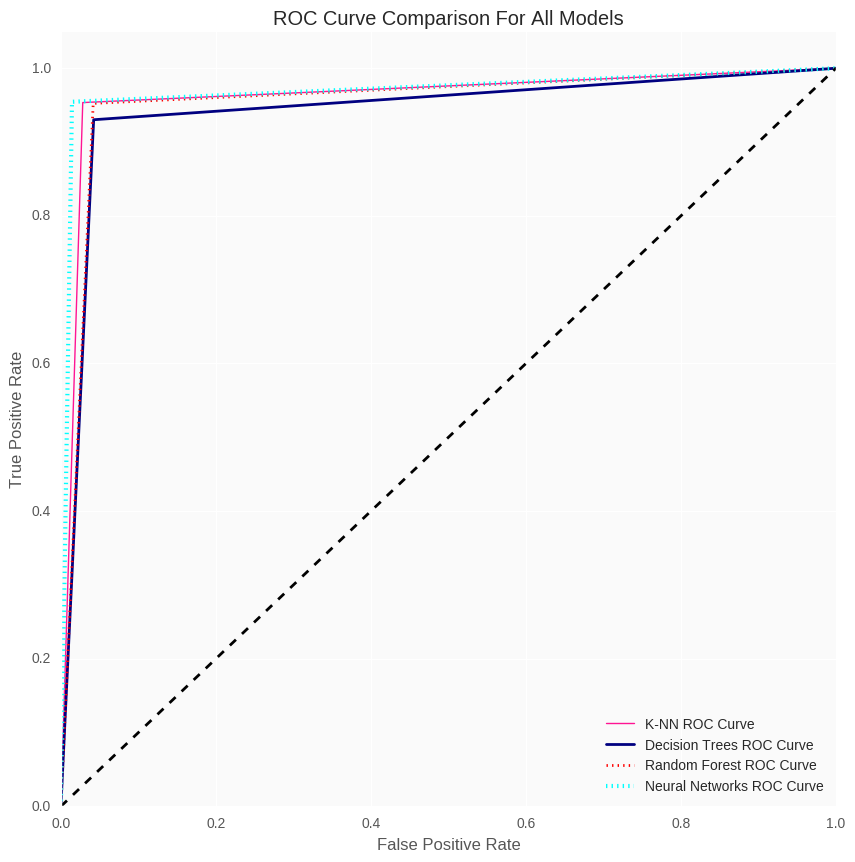

In [43]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.plot(fpr, tpr, label='K-NN ROC Curve', color = 'deeppink', linewidth=1)
plt.plot(fpr1, tpr1,label='Decision Trees ROC Curve', color = 'navy', linewidth=2)
plt.plot(fpr2, tpr2,label='Random Forest ROC Curve', color = 'red', linestyle=':', linewidth=2)
plt.plot(fpr3, tpr3,label='Neural Networks ROC Curve', color = 'aqua', linestyle=':', linewidth=3)

ax.set_axis_bgcolor('#fafafa')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison For All Models')
plt.legend(loc="lower right")

plt.show()

Let's zoom in to get a better picture!

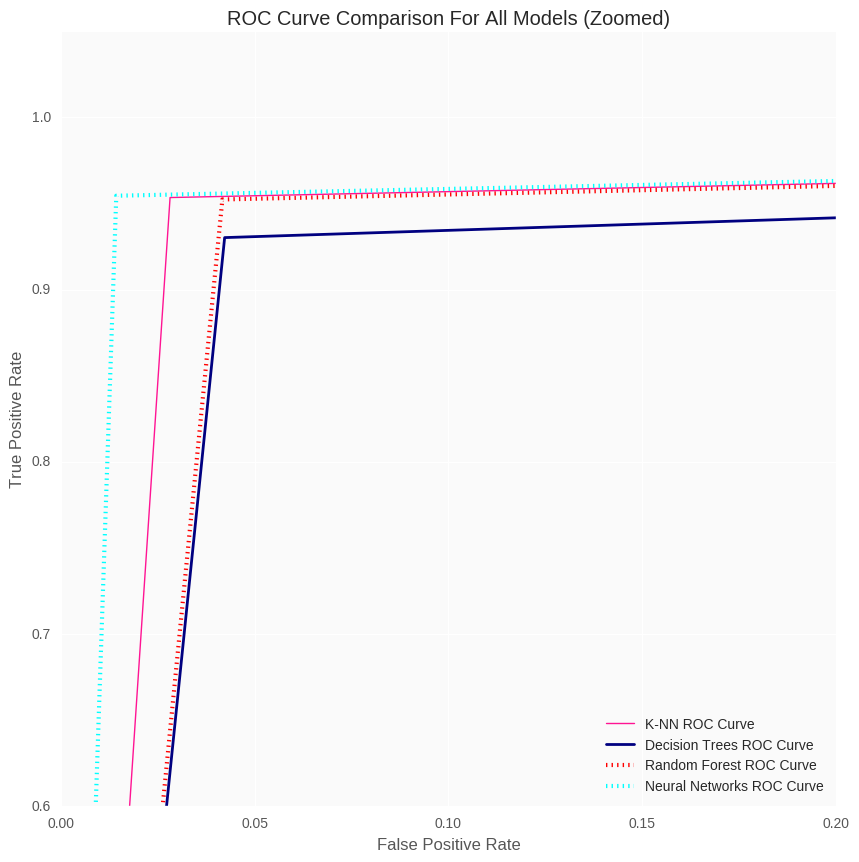

In [44]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.plot(fpr, tpr, label='K-NN ROC Curve', color = 'deeppink', linewidth=1)
plt.plot(fpr1, tpr1,label='Decision Trees ROC Curve', color = 'navy', linewidth=2)
plt.plot(fpr2, tpr2,label='Random Forest ROC Curve', color = 'red', linestyle=':', linewidth=3)
plt.plot(fpr3, tpr3,label='Neural Networks ROC Curve', color = 'aqua', linestyle=':', linewidth=3)


ax.set_axis_bgcolor('#fafafa')
plt.plot([0, 1], [0, 1], 'k--', lw=2) # Add Diagonal line
plt.xlim([0.0, 0.2])
plt.ylim([0.6, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison For All Models (Zoomed)')
plt.legend(loc="lower right")

plt.show()

## Conclusions

As you can see for this project **Neural Networks** were able to perform significantly better than all other models I used. But since **Neural Networks** is considered a *black box* model it doesn't really give us much insight as to what variables were able to indicate which specimen's were *Malignant* or *Benign*. So when drawing conclusions although a model could perform better than another, often we look to see which can tell us more of our data and ultimately **Random Forest**, was the model that was able to tell us more about the variable interaction while at the same time providing us with the smallest **Test Error Rate** and **False Negative**.

| Model/Algorithm | Test Error Rate | Predicted Benign (when actually Malignant) | 
|-----------------|-----------------|--------------------------------------------|
| Kth Nearest Neighbor | 0.03509 | 2 | 
| Decision Trees | 0.05263 | 3 | 
| Random Forest | 0.03509 | 3 | 
| Neural Networks | 0.02632 | 1 | 
